In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv ("E:/heart_disease_dataset/T&T_data.csv")
df = dataset.copy()
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


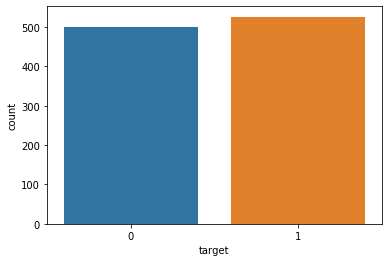

In [4]:
sns.countplot(x="target" , data=df)
plt.show()

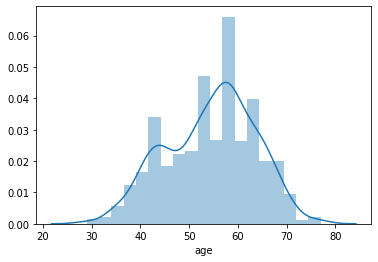

In [5]:
sns.distplot(df['age'])
plt.show()

In [6]:
df.groupby('target').mean()         

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [7]:
#Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['ca'], prefix = "ca")
frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2,thal_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1,0,0,1,0,0,1,0,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1,1,0,0,1,0,0,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,1,0,0,1,0,0,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,1,0,0,1,0,1,0,0,0
4,62,0,0,138,294,1,1,106,0,1.9,...,1,0,0,1,0,0,0,0,1,0


In [8]:
df = df.drop(columns = ['cp', 'thal', 'slope', 'ca'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,thal_2,thal_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,52,1,125,212,0,1,168,0,1.0,0,...,0,1,0,0,1,0,0,1,0,0
1,53,1,140,203,1,0,155,1,3.1,0,...,0,1,1,0,0,1,0,0,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,1,1,0,0,1,0,0,0,0
3,61,1,148,203,0,1,161,0,0.0,0,...,0,1,0,0,1,0,1,0,0,0
4,62,0,138,294,1,1,106,0,1.9,0,...,1,0,0,1,0,0,0,0,1,0


In [39]:
y = df['target']
x = df.drop('target',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 92)
alg1 = LogisticRegression(solver= 'newton-cg')
alg1.fit(x_train,y_train)
   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
score = alg1.score(x_test, y_test)
y_pred = alg1.predict(x_test)
print(score*100, "%" )

91.08635097493037 %


In [28]:
print(y_pred)

[0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1]


In [29]:
input_dataset = pd.read_csv ("E:/heart_disease_dataset/input_dataset.csv")
input_dataset.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca_0,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,130,220,1,1,168,0,1.0,0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,138,210,1,0,155,1,3.1,1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,150,200,0,1,125,1,2.6,1,...,0,0,0,0,0,0,1,1,0,0
3,61,1,143,215,0,1,161,0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,0,118,210,0,1,192,0,0.7,0,...,1,0,0,0,0,1,0,0,0,1


In [31]:
answer = alg1.predict(input_dataset)
print(answer)

[1 0 0 1 1 1]
